### Imports 

In [81]:
# Importando bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import zscore



# Configurações gerais
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [59]:
# Função para tratar outliers usando o método IQR
def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

### Conexão com banco de dados 

In [16]:
# Credenciais 
user = 'case_data_scientist'
password = 'mP2KQ6vUzi(7siM*'
host = '185.213.26.130'
database = 'case_data_scientist'
port = 6033

In [17]:
conn = mysql.connector.connect(
    user=user,
    password=password,
    host=host,
    database=database,
    port=port
)

In [18]:
# Criar cursor para executar comandos SQL
cursor = conn.cursor()

# Consultar  para listar todas as tabelas no banco de dados
cursor.execute("SHOW TABLES;")
tabelas = cursor.fetchall()

In [19]:
# Exiba as tabelas encontradas
print("Tabelas no banco de dados:")
for tabela in tabelas:
    print(tabela[0])

Tabelas no banco de dados:
daumau
desinstalacoes
installs
ratings_reviews


In [20]:
tabelas = ['daumau', 'desinstalacoes', 'installs', 'ratings_reviews']


In [21]:
for tabela in tabelas:
    # Consulta para selecionar todos os dados da tabela
    query = f"SELECT * FROM {tabela};"
    cursor = conn.cursor()
    cursor.execute(query)

    # Obtenha os resultados e as colunas
    resultados = cursor.fetchall()
    colunas = [desc[0] for desc in cursor.description]

    # Converta os dados para um DataFrame
    df = pd.DataFrame(resultados, columns=colunas)

    # Salve o DataFrame em um arquivo CSV
    nome_csv = f"raw_{tabela}.csv"
    df.to_csv(nome_csv, index=False, encoding='utf-8')
    print(f"Tabela '{tabela}' exportada para '{nome_csv}'.")

    # Feche o cursor após cada operação
    cursor.close()

# Feche a conexão com o banco de dados
conn.close()

Tabela 'daumau' exportada para 'raw_daumau.csv'.
Tabela 'desinstalacoes' exportada para 'raw_desinstalacoes.csv'.
Tabela 'installs' exportada para 'raw_installs.csv'.
Tabela 'ratings_reviews' exportada para 'raw_ratings_reviews.csv'.


In [ ]:
# Credenciais 
user = 'case_data_scientist'
password = 'mP2KQ6vUzi(7siM*'
host = '185.213.26.130'
database = 'case_data_scientist'
port = 6033

In [ ]:
conn = mysql.connector.connect(
    user=user,
    password=password,
    host=host,
    database=database,
    port=port
)

In [ ]:
# Criar cursor para executar comandos SQL
cursor = conn.cursor()

# Consultar  para listar todas as tabelas no banco de dados
cursor.execute("SHOW TABLES;")
tabelas = cursor.fetchall()

In [ ]:
# Exiba as tabelas encontradas
print("Tabelas no banco de dados:")
for tabela in tabelas:
    print(tabela[0])

Tabelas no banco de dados:
daumau
desinstalacoes
installs
ratings_reviews


In [ ]:
tabelas = ['daumau', 'desinstalacoes', 'installs', 'ratings_reviews']


In [ ]:
for tabela in tabelas:
    # Consulta para selecionar todos os dados da tabela
    query = f"SELECT * FROM {tabela};"
    cursor = conn.cursor()
    cursor.execute(query)

    # Obtenha os resultados e as colunas
    resultados = cursor.fetchall()
    colunas = [desc[0] for desc in cursor.description]

    # Converta os dados para um DataFrame
    df = pd.DataFrame(resultados, columns=colunas)

    # Salve o DataFrame em um arquivo CSV
    nome_csv = f"raw_{tabela}.csv"
    df.to_csv(nome_csv, index=False, encoding='utf-8')
    print(f"Tabela '{tabela}' exportada para '{nome_csv}'.")

    # Feche o cursor após cada operação
    cursor.close()

# Feche a conexão com o banco de dados
conn.close()

Tabela 'daumau' exportada para 'raw_daumau.csv'.
Tabela 'desinstalacoes' exportada para 'raw_desinstalacoes.csv'.
Tabela 'installs' exportada para 'raw_installs.csv'.
Tabela 'ratings_reviews' exportada para 'raw_ratings_reviews.csv'.


### Import Data

In [5]:
df_daumau = pd.read_csv(r"C:\Users\User\Documents\Estudos Ciencia de dados\case\data\raw_daumau.csv")
df_desinstalacoes = pd.read_csv(r"C:\Users\User\Documents\Estudos Ciencia de dados\case\data\raw_desinstalacoes.csv")
df_installs = pd.read_csv(r"C:\Users\User\Documents\Estudos Ciencia de dados\case\data\raw_installs.csv")
df_ratings = pd.read_csv(r"C:\Users\User\Documents\Estudos Ciencia de dados\case\data\raw_ratings_reviews.csv")

In [6]:
for name, df in zip(['Ratings', 'Installs', 'Desinstalações', 'DAU/MAU'], 
                    [df_ratings, df_installs, df_desinstalacoes, df_daumau]):
    print(f"Dataset: {name}")
    print(df.info())
    print(df.describe(include='all'), '\n\n')

Dataset: Ratings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47155 entries, 0 to 47154
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           47155 non-null  object 
 1   appid          47155 non-null  object 
 2   category       47155 non-null  object 
 3   ratings        47155 non-null  float64
 4   daily_ratings  47155 non-null  float64
 5   reviews        47155 non-null  float64
 6   daily_reviews  47155 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.5+ MB
None
              date          appid category       ratings  daily_ratings  \
count        47155          47155    47155  4.715500e+04   47155.000000   
unique         274            182        6           NaN            NaN   
top     2024-02-06  com.app.40009  FINANCE           NaN            NaN   
freq           174            274    18667           NaN            NaN   
mean           NaN            NaN      NaN  3.6

#### ratings

- Análise:

   - Identificar duplicados.
   -  Analisar distribuição de variáveis numéricas.
   - Tratar nulos
   - Visualizar correlações.

In [7]:
# Duplicados
print(f"Duplicados em df_ratings: {df_ratings.duplicated().sum()}")

# Nulos
print("Valores ausentes por coluna:")
print(df_ratings.isnull().sum())

Duplicados em df_ratings: 0
Valores ausentes por coluna:
date             0
appid            0
category         0
ratings          0
daily_ratings    0
reviews          0
daily_reviews    0
dtype: int64


In [8]:
# Estatísticas descritivas
print(df_ratings.describe())

            ratings  daily_ratings       reviews  daily_reviews
count  4.715500e+04   47155.000000  4.715500e+04   47155.000000
mean   3.655470e+05     149.257173  9.428167e+04      21.647673
std    1.231673e+06     591.007870  2.348399e+05      68.893436
min    1.000000e+01    -711.000000  4.000000e+00     -75.000000
25%    8.400000e+03       2.000000  2.572000e+03       0.000000
50%    4.392200e+04      12.000000  1.347000e+04       3.000000
75%    2.044095e+05      74.000000  5.027700e+04      12.000000
max    1.323622e+07   34180.000000  1.491128e+06    2290.000000


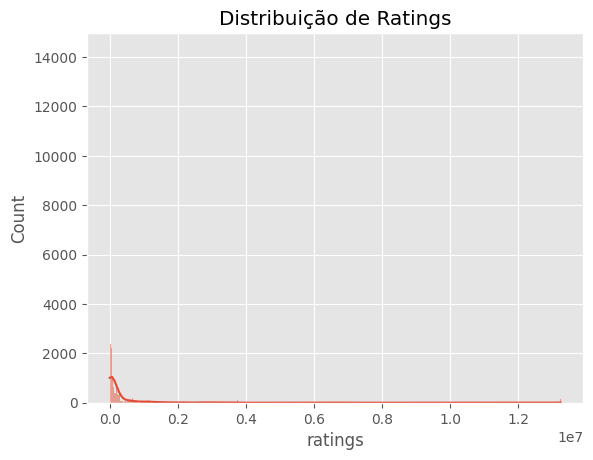

In [9]:
# Distribuição de ratings
sns.histplot(df_ratings['ratings'], kde=True)
plt.title('Distribuição de Ratings')
plt.show()

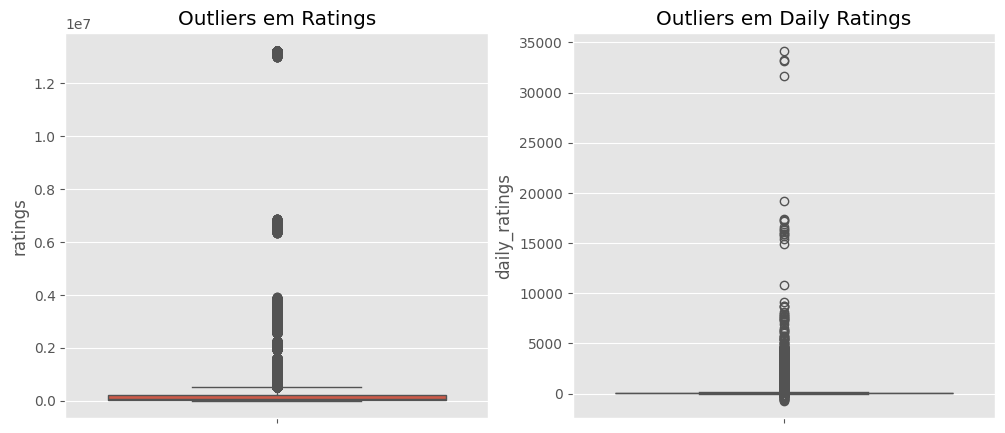

In [27]:
# Análise visual de outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df_ratings['ratings'], ax=axes[0])
sns.boxplot(y=df_ratings['daily_ratings'], ax=axes[1])
axes[0].set_title('Outliers em Ratings')
axes[1].set_title('Outliers em Daily Ratings')
plt.show()

In [28]:
# Definindo limites de IQR
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return np.clip(df[column], lower_limit, upper_limit)

In [29]:
# Aplicando o tratamento
df_ratings['ratings'] = treat_outliers_iqr(df_ratings, 'ratings')
df_ratings['daily_ratings'] = treat_outliers_iqr(df_ratings, 'daily_ratings')

#### Installs

- Análise:
  - Distribuição de newinstalls.
  - Identificação de sazonalidades (gráfico temporal).
  - Verificar outliers.

In [10]:
# Duplicados
print(f"Duplicados em df_ratings: {df_installs.duplicated().sum()}")

# Nulos
print("Valores ausentes por coluna:")
print(df_installs.isnull().sum())

Duplicados em df_ratings: 171
Valores ausentes por coluna:
appid          0
date           0
newinstalls    0
dtype: int64


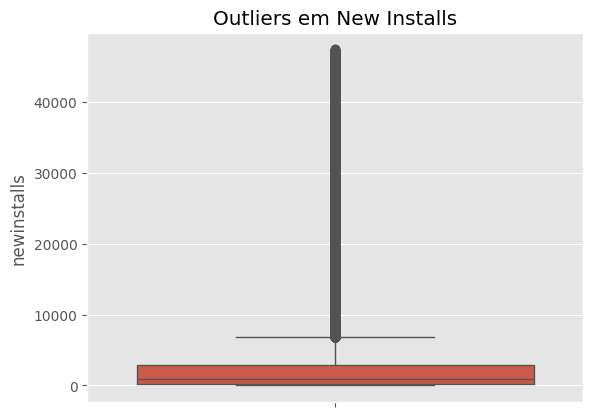

In [30]:
# Visualização de outliers
sns.boxplot(y=df_installs['newinstalls'])
plt.title('Outliers em New Installs')
plt.show()

In [31]:
# Tratamento por percentis
p1 = df_installs['newinstalls'].quantile(0.01)
p99 = df_installs['newinstalls'].quantile(0.99)
df_installs['newinstalls'] = np.clip(df_installs['newinstalls'], p1, p99)

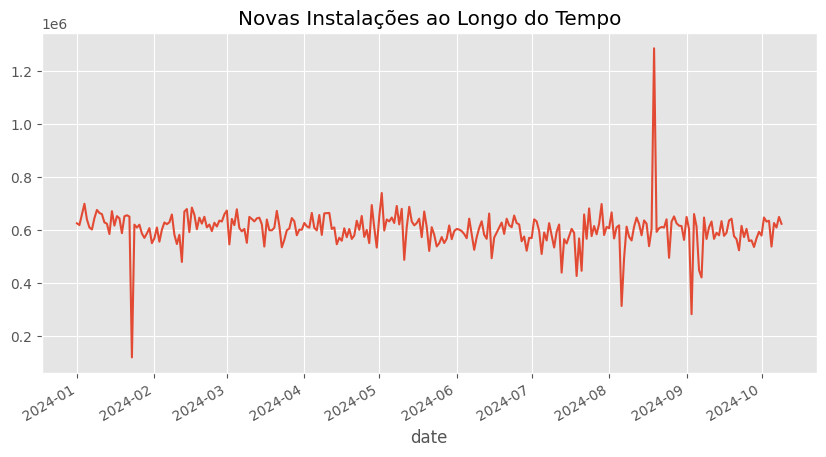

In [32]:
# Séries temporais
df_installs['date'] = pd.to_datetime(df_installs['date'])
df_installs.groupby('date')['newinstalls'].sum().plot(figsize=(10, 5))
plt.title('Novas Instalações ao Longo do Tempo')
plt.show()


#### desinstalacoes

- Análise:
  - Impacto de predictionLoss sobre DAU.
  - Remoção de colunas irrelevantes (country, lang).

In [14]:
# Duplicados
print(f"Duplicados em df_ratings: {df_desinstalacoes.duplicated().sum()}")

# Nulos
print("Valores ausentes por coluna:")
print(df_desinstalacoes.isnull().sum())

Duplicados em df_ratings: 0
Valores ausentes por coluna:
appId             0
date              0
country           0
lang              0
predictionLoss    0
dtype: int64


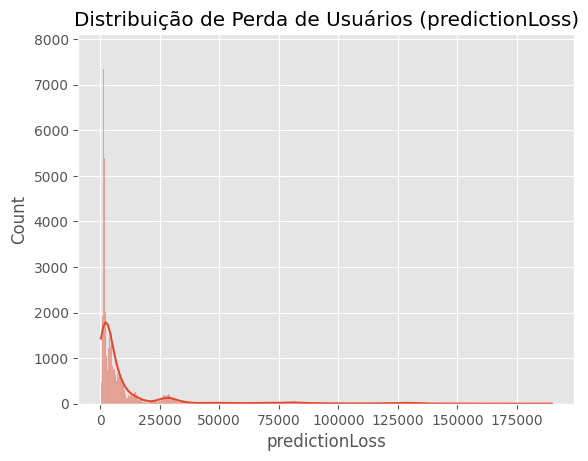

In [15]:
# Distribuição de predictionLoss
sns.histplot(df_desinstalacoes['predictionLoss'], kde=True)
plt.title('Distribuição de Perda de Usuários (predictionLoss)')
plt.show()

In [16]:
# Tratamento
df_desinstalacoes = df_desinstalacoes[['appId', 'date', 'predictionLoss']]

In [35]:
# Garantindo que tenho meus valores en z score menor que 3 
z_scores = zscore(df_desinstalacoes['predictionLoss'])
abs_z_scores = np.abs(z_scores)
df_desinstalacoes = df_desinstalacoes[abs_z_scores < 3]  # Removendo z-scores maiores que 3

#### Daumau

In [17]:
# Duplicados
print(f"Duplicados em df_daumau: {df_daumau.duplicated().sum()}")

# Nulos
print("Valores ausentes por coluna:")
print(df_daumau.isnull().sum())

Duplicados em df_daumau: 153
Valores ausentes por coluna:
appId       28
date         0
dauReal    194
mauReal     20
dtype: int64


In [18]:
# Remoção de duplicados
print(f"Duplicados antes: {df_daumau.duplicated().sum()}")
df_daumau.drop_duplicates(inplace=True)
print(f"Duplicados depois: {df_daumau.duplicated().sum()}")

Duplicados antes: 153
Duplicados depois: 0


In [19]:
# Remoção de registros com appId ausente
print(f"Registros antes de remover appId nulo: {len(df_daumau)}")
df_daumau = df_daumau[~df_daumau['appId'].isnull()]
print(f"Registros após remover appId nulo: {len(df_daumau)}")

Registros antes de remover appId nulo: 41146
Registros após remover appId nulo: 41118


Correlação entre dauReal e mauReal:
          dauReal   mauReal
dauReal  1.000000  0.901444
mauReal  0.901444  1.000000


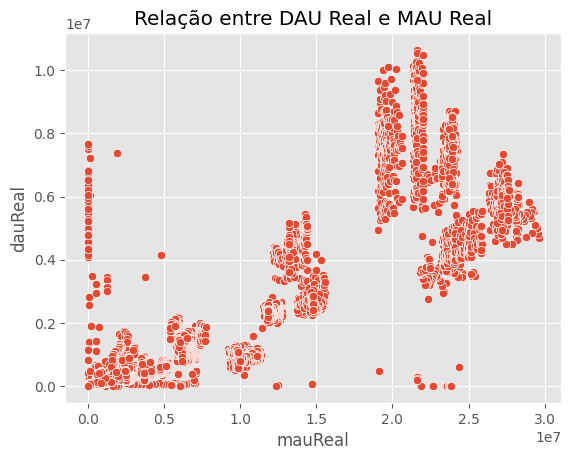

In [20]:
# Correlação entre dauReal e mauReal
correlation = df_daumau[['dauReal', 'mauReal']].corr()
print("Correlação entre dauReal e mauReal:")
print(correlation)

# gráfico de dispersão
sns.scatterplot(x='mauReal', y='dauReal', data=df_daumau)
plt.title("Relação entre DAU Real e MAU Real")
plt.show()

In [21]:
# Separando os registros completos para treinar o modelo
complete_data = df_daumau.dropna(subset=['dauReal', 'mauReal'])
X = complete_data[['mauReal']]
y = complete_data['dauReal']

# Treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Coeficientes da regressão
print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)

Coeficiente: 0.25123804658626814
Intercepto: -42440.407685591956


In [22]:
# Identificando os registros com valores ausentes em dauReal
missing_data = df_daumau[df_daumau['dauReal'].isnull()]

# Prevendo os valores ausentes
predicted_dau = model.predict(missing_data[['mauReal']])

# Substituindo os valores ausentes por previsões
df_daumau.loc[missing_data.index, 'dauReal'] = predicted_dau

In [23]:
# Verificando se ainda há valores ausentes em dauReal
print("Valores ausentes em dauReal após preenchimento:", df_daumau['dauReal'].isnull().sum())


Valores ausentes em dauReal após preenchimento: 0


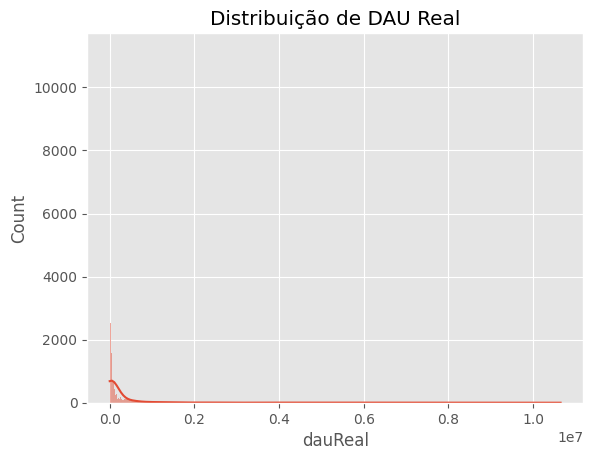

In [12]:
# Distribuição de DAU
sns.histplot(df_daumau['dauReal'], kde=True)
plt.title('Distribuição de DAU Real')
plt.show()

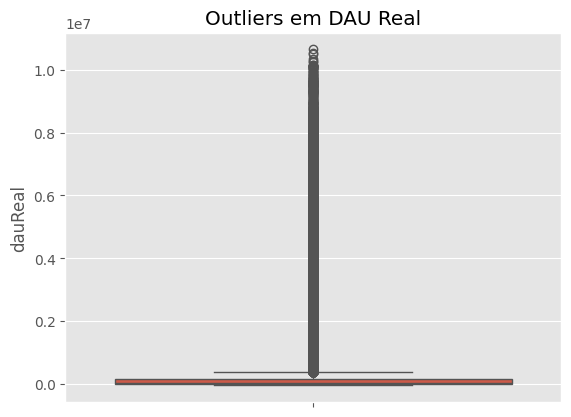

In [36]:
# Visualização de outliers
sns.boxplot(y=df_daumau['dauReal'])
plt.title('Outliers em DAU Real')
plt.show()

In [38]:
# Tratamento com IQR
df_daumau.loc[:, 'dauReal'] = treat_outliers_iqr(df_daumau, 'dauReal')


#### Consolidação dos dados df final 

In [43]:
# Padronizando o nome da coluna chave em todos os DataFrames
df_ratings = df_ratings.rename(columns={"appid": "appId"})
df_installs = df_installs.rename(columns={"appid": "appId"})
df_desinstalacoes = df_desinstalacoes.rename(columns={"appId": "appId"})
df_daumau = df_daumau.rename(columns={"appId": "appId"})

In [47]:
# Garantindo que a coluna "date" seja do tipo datetime em todos os DataFrames
df_daumau['date'] = pd.to_datetime(df_daumau['date'])
df_ratings['date'] = pd.to_datetime(df_ratings['date'])
df_installs['date'] = pd.to_datetime(df_installs['date'])
df_desinstalacoes['date'] = pd.to_datetime(df_desinstalacoes['date'])

In [48]:
df_final = df_daumau.merge(df_ratings, on=["appId", "date"], how="inner")
df_final = df_final.merge(df_installs, on=["appId", "date"], how="inner")
df_final = df_final.merge(df_desinstalacoes, on=["appId", "date"], how="inner")

In [52]:
# Examinando o DataFrame consolidado
print("Tamanho do DataFrame consolidado:", df_final.shape)

Tamanho do DataFrame consolidado: (36936, 11)


In [53]:
# Verificando duplicados
print("Duplicados no DataFrame consolidado:", df_final.duplicated().sum())

# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df_final.isnull().sum())


Duplicados no DataFrame consolidado: 135
Valores ausentes por coluna:
appId             0
date              0
dauReal           0
mauReal           0
category          0
ratings           0
daily_ratings     0
reviews           0
daily_reviews     0
newinstalls       0
predictionLoss    0
dtype: int64


In [63]:
df_final = df_final.rename(columns={"dauReal": "target"})


In [107]:
df_final

,appId,date,target,mauReal,category,ratings,daily_ratings,reviews,daily_reviews,newinstalls,predictionLoss
0,33540,2024-01-01,346352.125,1.000000,1,0.510261,1.000000,0.698710,1.000,1.000000,0.397742
1,33540,2024-01-02,346352.125,1.000000,1,0.510938,1.000000,0.699102,1.000,1.000000,0.487292
2,31679,2024-01-01,157532.000,0.741045,1,0.633285,0.845996,1.000000,0.825,0.349401,0.197556
3,31679,2024-01-02,313847.000,0.741076,1,0.633586,1.000000,1.000000,0.700,0.348916,0.279270
4,77385,2024-01-01,239768.000,1.000000,1,0.449806,1.000000,0.677152,0.975,0.507279,0.208383
...,...,...,...,...,...,...,...,...,...,...,...
36931,16773,2024-09-30,346352.125,1.000000,1,0.346762,0.981520,0.670885,1.000,0.965545,0.320049
36932,91093,2024-09-30,346352.125,1.000000,1,0.484893,1.000000,0.963258,1.000,0.923649,0.360468
36933,39058,2024-09-30,16980.000,0.064101,1,0.005872,0.336756,0.010137,0.450,0.044969,0.071248
36934,79754,2024-09-30,7996.000,0.068639,3,0.311208,1.000000,0.078638,0.725,0.092365,0.398773


In [78]:
# Identificando colunas numéricas e categóricas
numerical_cols = df_final.select_dtypes(include=["float64", "int64"]).columns
numerical_cols = [col for col in numerical_cols if col != 'target']

categorical_cols = ['category']

In [65]:
# Tratando valores ausentes em variáveis numéricas
for col in numerical_cols:
    median_value = df_final[col].median()
    df_final[col] = df_final[col].fillna(median_value)

In [71]:
# Verificando novamente valores ausentes
print("Valores ausentes após tratamento:")
print(df_final.isnull().sum())

Valores ausentes após tratamento:
appId             0
date              0
target            0
mauReal           0
category          0
ratings           0
daily_ratings     0
reviews           0
daily_reviews     0
newinstalls       0
predictionLoss    0
dtype: int64


In [72]:
# Aplicando o tratamento em todas as variáveis numéricas
for col in numerical_cols:
    treat_outliers_iqr(df_final, col)

# Verificação: estatísticas descritivas após o tratamento
print(df_final[numerical_cols].describe())

            mauReal        ratings  daily_ratings        reviews  \
count  3.693600e+04   36936.000000   36936.000000   36936.000000   
mean   5.804298e+05  119016.181408      46.191101   33774.087516   
std    6.550275e+05  149494.956403      61.711578   41422.207528   
min    7.660000e+02      19.000000     -74.000000      11.000000   
25%    9.232850e+04    9014.750000       2.000000    3173.000000   
50%    2.555525e+05   46164.000000      13.000000   15279.500000   
75%    7.835920e+05  180878.750000      69.000000   48944.000000   
max    1.820487e+06  438674.750000     169.500000  117600.500000   

       daily_reviews   newinstalls  predictionLoss  
count   36936.000000  36936.000000    36936.000000  
mean        7.355859   1831.221545     6647.396957  
std         9.231999   2066.793732     6359.744470  
min       -14.000000      0.000000      455.000000  
25%         1.000000    307.000000     1797.000000  
50%         3.000000    875.000000     4058.500000  
75%        11.00

In [82]:
# Aplicando MinMaxScaler
scaler = MinMaxScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

In [87]:
from sklearn.preprocessing import LabelEncoder

# Verificando se appId é relevante
# Caso decida utilizar appId, vamos aplicar Label Encoding para transformá-lo em número
encoder = LabelEncoder()
df_final["category"] = encoder.fit_transform(df_final['category'])

In [ ]:
# Removendo a parte 'com.app.' do 'appId' e deixando apenas o número
df_final['appId'] = df_final['appId'].str.replace('com.app.', '', regex=False)

# Convertendo para inteiro (ou float, dependendo do seu caso)
df_final['appId'] = df_final['appId'].astype(int)

In [90]:
df_final

,appId,date,target,mauReal,category,ratings,daily_ratings,reviews,daily_reviews,newinstalls,predictionLoss
0,33540,2024-01-01,346352.125,1.000000,1,0.510261,1.000000,0.698710,1.000,1.000000,0.397742
1,33540,2024-01-02,346352.125,1.000000,1,0.510938,1.000000,0.699102,1.000,1.000000,0.487292
2,31679,2024-01-01,157532.000,0.741045,1,0.633285,0.845996,1.000000,0.825,0.349401,0.197556
3,31679,2024-01-02,313847.000,0.741076,1,0.633586,1.000000,1.000000,0.700,0.348916,0.279270
4,77385,2024-01-01,239768.000,1.000000,1,0.449806,1.000000,0.677152,0.975,0.507279,0.208383
...,...,...,...,...,...,...,...,...,...,...,...
36931,16773,2024-09-30,346352.125,1.000000,1,0.346762,0.981520,0.670885,1.000,0.965545,0.320049
36932,91093,2024-09-30,346352.125,1.000000,1,0.484893,1.000000,0.963258,1.000,0.923649,0.360468
36933,39058,2024-09-30,16980.000,0.064101,1,0.005872,0.336756,0.010137,0.450,0.044969,0.071248
36934,79754,2024-09-30,7996.000,0.068639,3,0.311208,1.000000,0.078638,0.725,0.092365,0.398773


In [106]:
df_final

,appId,date,target,mauReal,category,ratings,daily_ratings,reviews,daily_reviews,newinstalls,predictionLoss
0,33540,2024-01-01,346352.125,1.000000,1,0.510261,1.000000,0.698710,1.000,1.000000,0.397742
1,33540,2024-01-02,346352.125,1.000000,1,0.510938,1.000000,0.699102,1.000,1.000000,0.487292
2,31679,2024-01-01,157532.000,0.741045,1,0.633285,0.845996,1.000000,0.825,0.349401,0.197556
3,31679,2024-01-02,313847.000,0.741076,1,0.633586,1.000000,1.000000,0.700,0.348916,0.279270
4,77385,2024-01-01,239768.000,1.000000,1,0.449806,1.000000,0.677152,0.975,0.507279,0.208383
...,...,...,...,...,...,...,...,...,...,...,...
36931,16773,2024-09-30,346352.125,1.000000,1,0.346762,0.981520,0.670885,1.000,0.965545,0.320049
36932,91093,2024-09-30,346352.125,1.000000,1,0.484893,1.000000,0.963258,1.000,0.923649,0.360468
36933,39058,2024-09-30,16980.000,0.064101,1,0.005872,0.336756,0.010137,0.450,0.044969,0.071248
36934,79754,2024-09-30,7996.000,0.068639,3,0.311208,1.000000,0.078638,0.725,0.092365,0.398773


In [92]:
X = df_final.drop(columns=["target"])  # Variáveis independentes
y = df_final["target"]  # Variável dependente (target)

In [94]:
# Dividindo entre treino + validação (80%) e teste (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agora, dividindo treino + validação entre treino (80%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [95]:
# Calculando o tamanho total
total_size = len(df_final)

# Calculando o tamanho de cada conjunto e suas porcentagens
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)

train_percentage = (train_size / total_size) * 100
val_percentage = (val_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

In [96]:
# Exibindo as porcentagens
print(f"Tamanho total do conjunto de dados: {total_size} registros")
print(f"Tamanho do conjunto de treinamento: {train_size} registros ({train_percentage:.2f}%)")
print(f"Tamanho do conjunto de validação: {val_size} registros ({val_percentage:.2f}%)")
print(f"Tamanho do conjunto de teste: {test_size} registros ({test_percentage:.2f}%)")


Tamanho total do conjunto de dados: 36936 registros
Tamanho do conjunto de treinamento: 23638 registros (64.00%)
Tamanho do conjunto de validação: 5910 registros (16.00%)
Tamanho do conjunto de teste: 7388 registros (20.00%)


#### Exportando os dados para CSV


In [99]:
# Concatenando X com y para salvar tudo em um único arquivo
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [104]:
# Exportando para CSV
train_df.to_csv('train_data.csv', index=False, encoding='utf-8')
val_df.to_csv('val_data.csv', index=False, encoding='utf-8')
test_df.to_csv('test_data.csv', index=False, encoding='utf-8')




In [105]:
train_df

,appId,date,mauReal,category,ratings,daily_ratings,reviews,daily_reviews,newinstalls,predictionLoss,target
2410,82896,2024-01-18,0.113072,1,0.038107,0.669405,0.029986,0.600,0.196700,0.247513,22964.000
232,72653,2024-01-01,0.061111,1,0.082197,0.312115,0.129825,0.400,0.166613,0.054699,15223.000
20517,94251,2024-05-31,0.133892,1,0.159708,0.340862,0.151417,0.375,0.265448,0.060370,56639.000
15694,54019,2024-04-26,0.028717,4,0.005262,0.308008,0.002415,0.350,0.053381,0.205908,4192.000
5441,50760,2024-02-10,0.096528,0,0.134800,0.349076,0.094779,0.350,0.043999,0.009641,29743.000
...,...,...,...,...,...,...,...,...,...,...,...
1782,88516,2024-01-15,0.008172,3,0.005565,0.312115,0.002577,0.350,0.093174,0.383616,1374.000
27415,85803,2024-07-23,0.039924,0,0.009333,0.320329,0.008096,0.350,0.015691,0.022942,6586.000
11451,36257,2024-03-26,1.000000,0,0.232722,0.603696,0.508353,1.000,1.000000,0.406197,346352.125
4316,80525,2024-02-02,0.119423,1,0.655637,0.266940,1.000000,0.225,0.123746,0.235500,12702.000
